In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [16]:
heartdata = pd.read_csv('heart_kaggle_project.csv')
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#randomize data since original set is "sorted" by target (looked at Csv file), almost all the data = categorical or Gaussian 
#(Kaggle), exception 
heartdata = heartdata.reindex(np.random.permutation(heartdata.index))
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [18]:
#locks in randomized data
heartdata = heartdata.reset_index(drop=True)
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
1,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
2,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
3,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [19]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


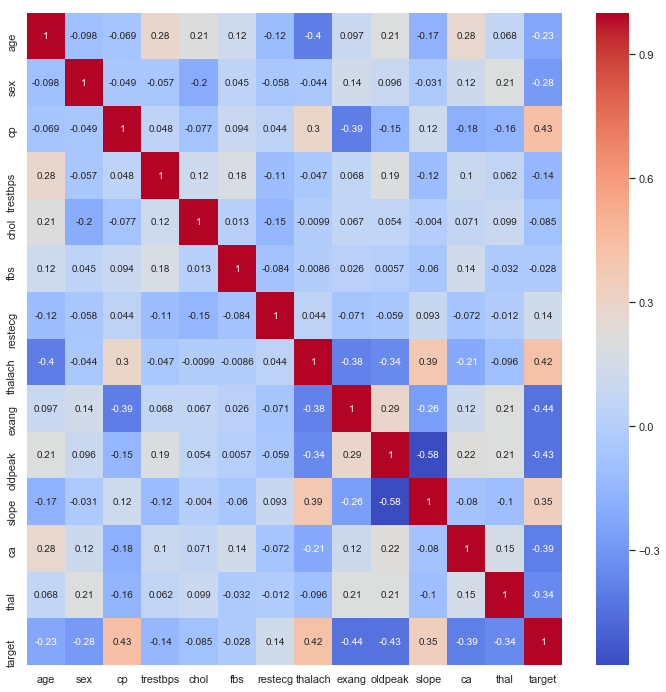

In [20]:
#correlatedata = heartdata.corr()
names = correlatedata.index
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(heartdata[names].corr(), annot = True, cmap ='coolwarm')

In [21]:
#positive corr with target :  cp thalach slope
#negative corr with target : exang oldpeak ca thal
#could drop chol and tbs 


In [22]:
y = heartdata['target']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [23]:
x = heartdata.drop('target', axis =1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,132,207,0,1,168,1,0.0,2,0,3
1,54,0,2,160,201,0,1,163,0,0.0,2,1,2
2,42,1,0,136,315,0,1,125,1,1.8,1,0,1
3,51,1,0,140,298,0,1,122,1,4.2,1,3,3
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [24]:
#Random Forest before scaling no dumbies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('RF (no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

0.8360655737704918
0.8032786885245902
0.8852459016393442
0.819672131147541
0.7868852459016393
0.8032786885245902
0.7213114754098361
0.8360655737704918
0.8032786885245902
0.7049180327868853
RF (no scaling, no dummies) Accuracy (mean of 10) 0.8


In [25]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('DT (no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

0.8524590163934426
0.7540983606557377
0.7540983606557377
0.7377049180327869
0.6885245901639344
0.7868852459016393
0.819672131147541
0.7377049180327869
0.6557377049180327
0.7540983606557377
DT (no scaling, no dummies) Accuracy (mean of 10) 0.7540983606557378


In [26]:
#categorical data "transformation"
x_d = pd.get_dummies(x, columns=['sex', 'fbs', 'exang', 'thal'])
x_d.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,57,0,132,207,1,168,0.0,2,0,0,1,1,0,0,1,0,0,0,1
1,54,2,160,201,1,163,0.0,2,1,1,0,1,0,1,0,0,0,1,0
2,42,0,136,315,1,125,1.8,1,0,0,1,1,0,0,1,0,1,0,0
3,51,0,140,298,1,122,4.2,1,3,0,1,1,0,0,1,0,0,0,1
4,60,0,117,230,1,160,1.4,2,2,0,1,0,1,0,1,0,0,0,1


In [27]:
#Random Forest before scaling with dumbies
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x_d, y, test_size=0.3) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    meanten.append(acc)
print('RF (no scaling, w/ dummies) Accuracy (mean of 10)', np.array(meanten).mean())

Accuracy: 0.7692307692307693
Accuracy: 0.7912087912087912
Accuracy: 0.8241758241758241
Accuracy: 0.7802197802197802
Accuracy: 0.7362637362637363
Accuracy: 0.8461538461538461
Accuracy: 0.8131868131868132
Accuracy: 0.8351648351648352
Accuracy: 0.7582417582417582
Accuracy: 0.7472527472527473
RF (no scaling, w/ dummies) Accuracy (mean of 10) 0.7901098901098902


In [28]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x_d, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('DT (no scaling, w/ dummies) Accuracy (mean of 10)', np.array(meanten).mean())

DT (no scaling, w/ dummies) Accuracy (mean of 10) 0.7704918032786886


In [29]:
#reduced dataset -remove selected features with low corr to target
xdropch_fb = x.drop('chol', axis =1)
xdropch_fb = xdropch_fb.drop('fbs', axis =1)
xdropch_fb.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,132,1,168,1,0.0,2,0,3
1,54,0,2,160,1,163,0,0.0,2,1,2
2,42,1,0,136,1,125,1,1.8,1,0,1
3,51,1,0,140,1,122,1,4.2,1,3,3
4,60,1,0,117,1,160,1,1.4,2,2,3


In [30]:
#RF with reduced dataset no dummies
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fb, y, test_size=0.3) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    meanten.append(acc)
print('RF (reduced data, no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

Accuracy: 0.8021978021978022
Accuracy: 0.7912087912087912
Accuracy: 0.7252747252747253
Accuracy: 0.7472527472527473
Accuracy: 0.8461538461538461
Accuracy: 0.8131868131868132
Accuracy: 0.8241758241758241
Accuracy: 0.7912087912087912
Accuracy: 0.7912087912087912
Accuracy: 0.8351648351648352
RF (reduced data, no scaling, no dummies) Accuracy (mean of 10) 0.7967032967032968


In [31]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fb, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('DT (reduced data, no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

DT (reduced data, no scaling, no dummies) Accuracy (mean of 10) 0.7688524590163934


In [32]:
#categorical data "transformation" of reduced dataset
xdropch_fbd = pd.get_dummies(xdropch_fb, columns=['sex', 'exang', 'thal'])
xdropch_fbd.head()

,age,cp,trestbps,restecg,thalach,oldpeak,slope,ca,sex_0,sex_1,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,57,0,132,1,168,0.0,2,0,0,1,0,1,0,0,0,1
1,54,2,160,1,163,0.0,2,1,1,0,1,0,0,0,1,0
2,42,0,136,1,125,1.8,1,0,0,1,0,1,0,1,0,0
3,51,0,140,1,122,4.2,1,3,0,1,0,1,0,0,0,1
4,60,0,117,1,160,1.4,2,2,0,1,0,1,0,0,0,1


In [33]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fbd, y, test_size=0.2) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    meanten.append(acc)
print(np.array(meanten).mean())

Accuracy: 0.8360655737704918
Accuracy: 0.7704918032786885
Accuracy: 0.8688524590163934
Accuracy: 0.7377049180327869
Accuracy: 0.8360655737704918
Accuracy: 0.7868852459016393
Accuracy: 0.7377049180327869
Accuracy: 0.819672131147541
Accuracy: 0.7704918032786885
Accuracy: 0.7868852459016393
0.7950819672131149


In [34]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fbd, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('Accuracy (mean of 10)', np.array(meanten).mean())

0.7540983606557377
0.819672131147541
0.7049180327868853
0.8360655737704918
0.7704918032786885
0.7213114754098361
0.7704918032786885
0.7704918032786885
0.8360655737704918
0.7049180327868853
Accuracy (mean of 10) 0.7688524590163934


In [35]:
#scale selected features (z-socre), dataset with dummies
x_ds = x_d
x_ds[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = StandardScaler().fit_transform(x_ds[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
x_ds.head()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,0.290464,0,0.021488,-0.758796,1,0.802592,-0.896862,2,0,0,1,1,0,0,1,0,0,0,1
1,-0.040403,2,1.620649,-0.874749,1,0.583939,-0.896862,2,1,1,0,1,0,1,0,0,0,1,0
2,-1.363869,0,0.249940,1.328356,1,-1.077820,0.655990,1,0,0,1,1,0,0,1,0,1,0,0
3,-0.371269,0,0.478391,0.999823,1,-1.209011,2.726460,1,3,0,1,1,0,0,1,0,0,0,1
4,0.621330,0,-0.835206,-0.314310,1,0.452748,0.310912,2,2,0,1,0,1,0,1,0,0,0,1


In [36]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x_ds, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('Accuracy (mean of 100)', np.array(meanten).mean())

Accuracy (mean of 100) 0.7344262295081968


In [37]:
#scale selected features (z-socre), reduced dataset with dummies
xdropch_fbds =xdropch_fbd
xdropch_fbds[['age', 'trestbps', 'thalach', 'oldpeak']] = StandardScaler().fit_transform(xdropch_fbd[['age', 'trestbps', 'thalach', 'oldpeak']])
xdropch_fbds.head()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,cp,trestbps,restecg,thalach,oldpeak,slope,ca,sex_0,sex_1,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,0.290464,0,0.021488,1,0.802592,-0.896862,2,0,0,1,0,1,0,0,0,1
1,-0.040403,2,1.620649,1,0.583939,-0.896862,2,1,1,0,1,0,0,0,1,0
2,-1.363869,0,0.249940,1,-1.077820,0.655990,1,0,0,1,0,1,0,1,0,0
3,-0.371269,0,0.478391,1,-1.209011,2.726460,1,3,0,1,0,1,0,0,0,1
4,0.621330,0,-0.835206,1,0.452748,0.310912,2,2,0,1,0,1,0,0,0,1


In [38]:
#oldpeak and ca skewed, transform?
#log transform of oldpeak
oldpeaklog = np.log(x['oldpeak'] + 1)

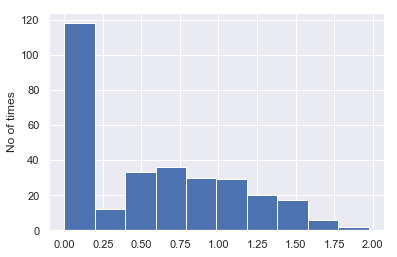

In [39]:
plt.hist(oldpeaklog, bins=10)
plt.ylabel('No of times')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

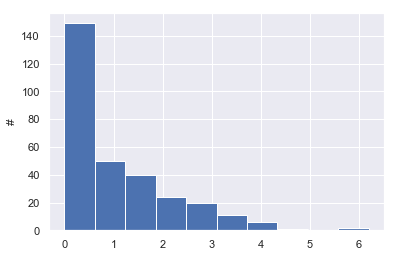

In [40]:
plt.hist(heartdata['oldpeak'])
plt.ylabel('#')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

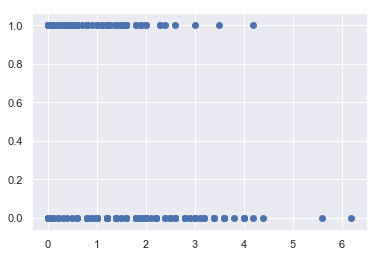

In [41]:
plt.scatter(heartdata['oldpeak'], y)
plt.show


In [42]:
# not sure how to transform so will leave simply as z-score for now, looks like ca same
#these have a decent negative correlation with target so maybe be helpful if properly transformed 
#maybe binning, maybe not necessary

In [43]:
#scout classifiers with scaled data (RF and DT included even tho don't need scaling)
#first - x_ds - all featured
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ds, y, test_size=0.2) 

from sklearn import metrics

In [44]:
#scout classifiers with transformed data
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers = []
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)
SVMmodel = svm.SVC()
classifiers.append(SVMmodel)
DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)
KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)
LRmodel = LogisticRegression()
classifiers.append(LRmodel)

In [45]:
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print((i))
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.987603305785124
Accuracy:   0.7377049180327869
Confusion Matrix: 
[[20  9]
 [ 7 25]]



C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.9132231404958677
Accuracy:   0.8032786885245902
Confusion Matrix: 
[[21  8]
 [ 4 28]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Model score:  1.0
Accuracy:   0.6557377049180327
Confusion Matrix: 
[[21  8]
 [13 19]]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Model score:  0.9008264462809917
Accuracy:   0.770491803

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Model score:  0.8636363636363636
Accuracy:   0.8032786885245902
Confusion Matrix: 
[[21  8]
 [ 4 28]]



In [46]:
#second - xdropch_fbds - all featured
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdropch_fbds, y, test_size=0.2) 

In [47]:
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print((i))
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()
    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model score:  0.9917355371900827
Accuracy:   0.8688524590163934
Confusion Matrix: 
[[23  4]
 [ 4 30]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Model score:  0.8801652892561983
Accuracy:   0.8688524590163934
Confusion Matrix: 
[[22  5]
 [ 3 31]]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
      

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
#All models perform fairly well, RF and DT appear to overfit (model score ~1), should optimize
#Other models maybe be overfitting as well
#Optimize models in next NB
#Keras neural network if time permits.
#Note: model accuracy and overall performance (as judged by confusion matrix) are to specific run - obvious change
#between runs


In [49]:
#minimize False Negatives - if there's a false positive further testing will show and risk to patient minimal.
#if false negative, negative prediction may result in no further testing even tho patient has heart disease! Patient: grave risk